In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data=pd.read_csv('https://raw.githubusercontent.com/sshumiye/Notes/master/health_data.csv')

In [32]:
data.head()

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,NaN,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,NaN,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,NaN,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 20 columns):
BIO_SEX      6503 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(15), int64(5)
memory usage: 1016.3 KB


In [34]:
data=data.dropna()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 1 to 6502
Data columns (total 20 columns):
BIO_SEX      4601 non-null float64
age          4601 non-null float64
TREG1        4601 non-null float64
ALCEVR1      4601 non-null float64
ALCPROBS1    4601 non-null int64
marever1     4601 non-null int64
cocever1     4601 non-null int64
inhever1     4601 non-null int64
cigavail     4601 non-null float64
DEP1         4601 non-null float64
ESTEEM1      4601 non-null float64
VIOL1        4601 non-null float64
PASSIST      4601 non-null int64
DEVIANT1     4601 non-null float64
SCHCONN1     4601 non-null float64
GPA1         4601 non-null float64
EXPEL1       4601 non-null float64
FAMCONCT     4601 non-null float64
PARACTV      4601 non-null float64
PARPRES      4601 non-null float64
dtypes: float64(15), int64(5)
memory usage: 754.9 KB


In [37]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [38]:
cluster=data[['ALCEVR1','marever1','ALCPROBS1','DEVIANT1','VIOL1','DEP1','ESTEEM1','SCHCONN1','PARACTV','PARPRES','FAMCONCT']]

%standardize the variables

In [52]:
cluster_s=cluster.copy()

In [62]:
cluster_s['ALCEVR1']=preprocessing.scale(cluster_s['ALCEVR1'].astype('float64'))

In [63]:
cluster_s['marever1']=preprocessing.scale(cluster_s['marever1'].astype('float64'))

In [64]:
cluster_s['ALCPROBS1']=preprocessing.scale(cluster_s['ALCPROBS1'].astype('float64'))

In [65]:
cluster_s['DEVIANT1']=preprocessing.scale(cluster_s['DEVIANT1'].astype('float64'))

In [66]:
cluster_s['VIOL1']=preprocessing.scale(cluster_s['VIOL1'].astype('float64'))

In [67]:
cluster_s['DEP1']=preprocessing.scale(cluster_s['DEP1'].astype('float64'))

In [68]:
cluster_s['ESTEEM1']=preprocessing.scale(cluster_s['ESTEEM1'].astype('float64'))

In [69]:
cluster_s['SCHCONN1']=preprocessing.scale(cluster_s['SCHCONN1'].astype('float64'))

In [70]:
cluster_s['PARACTV']=preprocessing.scale(cluster_s['PARACTV'].astype('float64'))

In [71]:
cluster_s['PARPRES']=preprocessing.scale(cluster_s['PARPRES'].astype('float64'))

In [72]:
cluster_s['FAMCONCT']=preprocessing.scale(cluster_s['FAMCONCT'].astype('float64'))

In [75]:
from sklearn.model_selection import train_test_split

In [79]:
cluster_train,cluster_test=train_test_split(cluster_s,test_size=0.3,random_state=222)

In [84]:
clusters=range(1,11)
mean_dist=[]

In [88]:
from scipy.spatial.distance import cdist

In [92]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(cluster_train,model.cluster_centers_,'euclidean'),axis=1))/cluster_train.shape[0])

In [132]:
mean_dist

[3.0936101390116146,
 2.7823693973762005,
 2.6196128073064413,
 2.5325191836006873,
 2.4471779927374655,
 2.372633001995194,
 2.331228243300863,
 2.285047494515404,
 2.241459569538561,
 2.2123004515441593]

Text(0, 0.5, 'mean distance ')

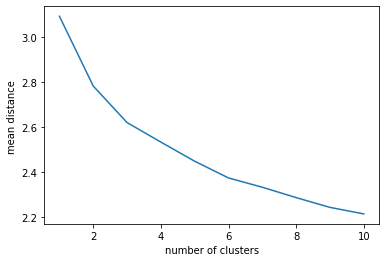

In [114]:
plt.plot(clusters,mean_dist)
plt.xlabel('number of clusters')
plt.ylabel('mean distance ')

In [115]:
#k=3 cluster solution

In [117]:
model1=KMeans(n_clusters=3)
model1.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [118]:
from sklearn.decomposition import PCA

In [155]:
pca2=PCA(2)

In [156]:
plot_columns=pca2.fit_transform(cluster_train)

Text(0.5, 1.0, 'plot for two cannonical variables')

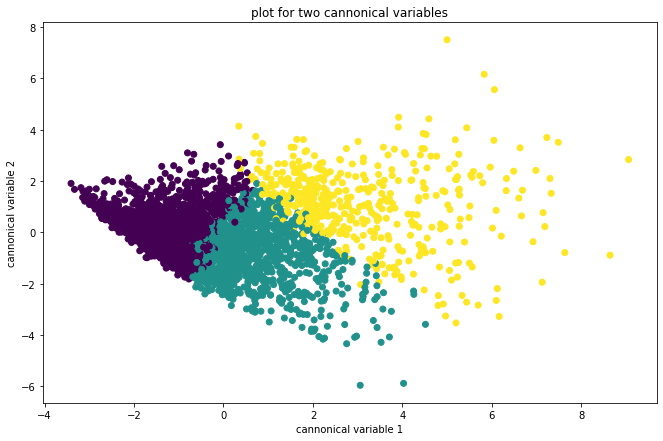

In [157]:
plt.figure(figsize=[11,7])
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=model1.labels_)
plt.xlabel('cannonical variable 1')
plt.ylabel('cannonical variable 2')
plt.title('plot for two cannonical variables')

In [ ]:
#2 cluster solution

In [134]:
model2=KMeans(n_clusters=2)
model2.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [135]:
pca2_2=PCA(2)

In [138]:
new_columns=pca2_2.fit_transform(cluster_train)

Text(0.5, 1.0, 'plot for two cannonical variables')

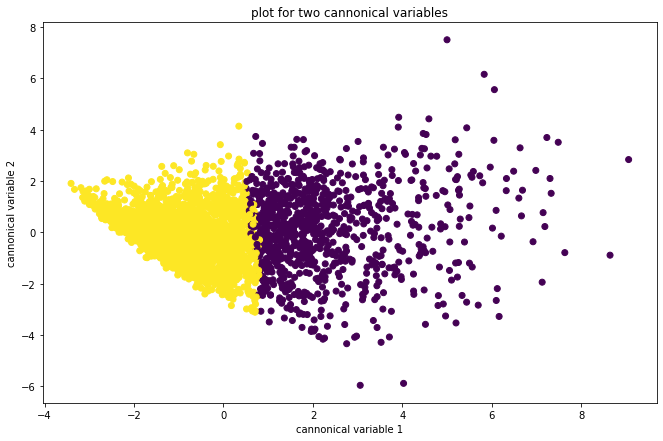

In [141]:
plt.figure(figsize=[11,7])
plt.scatter(x=new_colums[:,0],y=new_columns[:,1],c=model2.labels_)
plt.xlabel('cannonical variable 1')
plt.ylabel('cannonical variable 2')
plt.title('plot for two cannonical variables')